<a href="https://colab.research.google.com/github/LuisYurovich/Mentoria-N-16-An-lisis-Inteligente-de-Jugadores/blob/main/TP2_Mentoria_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diplomatura en Ciencia de Datos
---
## Mentorias N°16. Grupo 2
## Analisis inteligente de jugadores de un reconocido juego electronico


# Trabajo Práctico 2

**Integrantes:**


* Luis Federico Yurovich

* Nicolás Nazareno Rosales

* Rocío Martinez

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')



In [ ]:
df_new = pd.read_csv('/content/datos_jugadores_clean.csv')

In [ ]:
df_new.head()

,id,datetime,has_studies,country,gender,state,year_of_birth,cups,age_aprox
0,00037f39cf870a1f49129f9c82d935665d352ffd25ea32...,868,t,Venezuela,Hombre,Miranda,1997.0,1211,25.0
1,000f21ac06aceb9cdd0575e82d0d85fc39bed0a7a1d719...,4199,t,Venezuela,Hombre,Caracas,2003.0,1559,19.0
2,00328ce57bbc14b33bd6695bc8eb32cdf2fb5f3a7d89ec...,7243,t,Argentina,Hombre,Chubut,1996.0,1859,26.0
3,0038263cc90dfa55d621a6425e46020136a318d12b9743...,1326,t,Venezuela,Hombre,anzoategui,1996.0,1221,26.0
4,0087cf99a4636ebd9a0f66eaf98fde8bca977e2a274bc8...,869,t,Argentina,Hombre,Buenos Aires,1995.0,1200,27.0


# **Sección 1: Identificación**

**1) Identificar los nan y resolverlos.**

In [ ]:
df_new.rename(columns={'datetime':'number_of_records',
                        'cups':'max_cups'},
               inplace=True)
df_new.columns

Index(['id', 'number_of_records', 'has_studies', 'country', 'gender', 'state',
       'year_of_birth', 'max_cups', 'age_aprox'],
      dtype='object')

In [ ]:
df_new.isnull().sum()

id                   0
number_of_records    0
has_studies          7
country              7
gender               7
state                9
year_of_birth        7
max_cups             0
age_aprox            7
dtype: int64

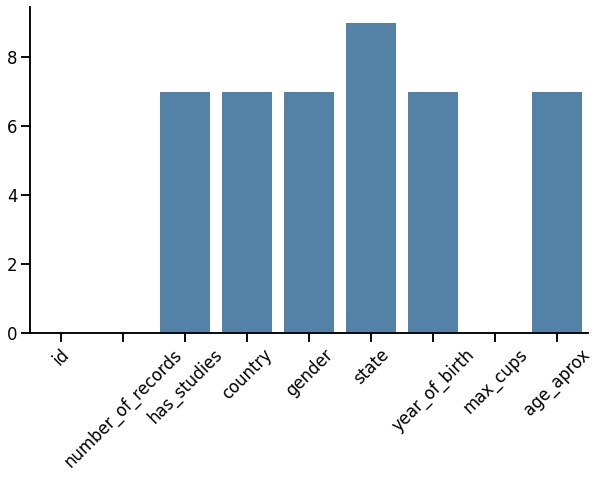

In [ ]:
plt.figure(figsize=(10,6))
seaborn.barplot(y=df_new.isnull().sum(), x = df_new.columns, color = 'steelblue')

plt.xticks(rotation=45)
seaborn.despine()

### Se puede visualizar que 5 de las 6 variables que contienen valores nulos, contienen 7 de estos. Solo 'state' contiene 8 valores nulos

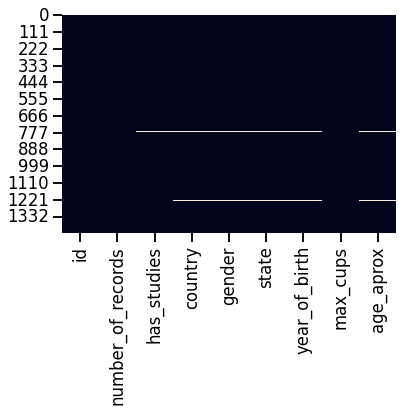

In [ ]:
#Visualizamos los datos faltantes
seaborn.heatmap(df_new.isnull(), cbar=False)

In [ ]:
nan_rows = df_new[df_new.isnull().any(1)]
nan_rows

,id,number_of_records,has_studies,country,gender,state,year_of_birth,max_cups,age_aprox
480,4ec9599fc203d176a301536c2e091a19bc852759b255bd...,10744,NaN,Argentina,Hombre,NaN,1994.0,1532,28.0
610,684fe39f03758de6a882ae61fa62312b67e5b1e665928c...,7735,NaN,NaN,NaN,NaN,NaN,1200,NaN
704,7688b6ef52555962d008fff894223582c484517cea7da4...,12011,NaN,NaN,NaN,NaN,NaN,1526,NaN
717,7902699be42c8a8e46fbbb4501726517e86b22c56a189f...,567,NaN,NaN,NaN,NaN,NaN,1370,NaN
722,79d6eaa2676189eb927f2e16a70091474078e2117c3fc6...,5463,NaN,NaN,NaN,NaN,NaN,1645,NaN
772,8241649609f88ccd2a0a5b233a07a538ec313ff6adf695...,11093,NaN,NaN,NaN,NaN,NaN,1321,NaN
1229,da2c575e48ee7651b9e99a511216b827ef6dea7ca08e77...,2166,f,NaN,NaN,NaN,NaN,1601,NaN
1260,e133553ea138da0438f229cc2273c76d2e44c23a1dcc98...,42,f,NaN,NaN,NaN,NaN,1000,NaN
1279,e629fa6598d732768f7c726b4b621285f9c3b85303900a...,9265,NaN,Argentina,Hombre,NaN,1998.0,1359,24.0


###Decidimos eliminar por completo 7 filas del nuevo dataframe, ya que al parecer la mayoria de los datos de cada fila es un dato faltante.

In [ ]:
df_sin_na=df_new.dropna(subset=['country', 'gender', 'year_of_birth', 'age_aprox'])

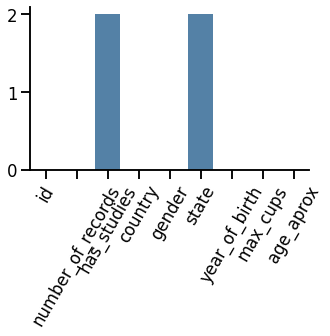

In [ ]:
plt.figure(figsize=(5,3))
seaborn.barplot(y=df_sin_na.isnull().sum(), x = df_sin_na.columns, color = 'steelblue')

plt.xticks(rotation=60)
seaborn.despine()

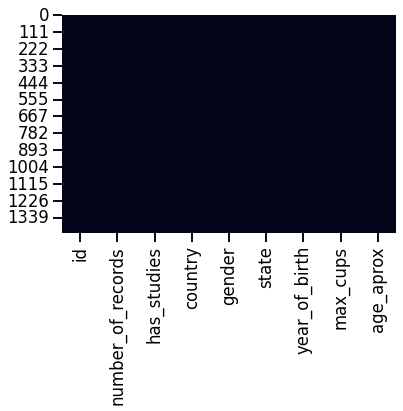

In [ ]:
seaborn.heatmap(df_sin_na.isnull(), cbar=False)

###Si observamos nuevamente el heatmap, podemos apreciar que casi no se distinguen los datos faltantes.

In [ ]:
df_sin_na.isnull().sum()

id                   0
number_of_records    0
has_studies          2
country              0
gender               0
state                2
year_of_birth        0
max_cups             0
age_aprox            0
dtype: int64

In [ ]:
df_sn = df_sin_na.copy()
df_sn

,id,number_of_records,has_studies,country,gender,state,year_of_birth,max_cups,age_aprox
0,00037f39cf870a1f49129f9c82d935665d352ffd25ea32...,868,t,Venezuela,Hombre,Miranda,1997.0,1211,25.0
1,000f21ac06aceb9cdd0575e82d0d85fc39bed0a7a1d719...,4199,t,Venezuela,Hombre,Caracas,2003.0,1559,19.0
2,00328ce57bbc14b33bd6695bc8eb32cdf2fb5f3a7d89ec...,7243,t,Argentina,Hombre,Chubut,1996.0,1859,26.0
3,0038263cc90dfa55d621a6425e46020136a318d12b9743...,1326,t,Venezuela,Hombre,anzoategui,1996.0,1221,26.0
4,0087cf99a4636ebd9a0f66eaf98fde8bca977e2a274bc8...,869,t,Argentina,Hombre,Buenos Aires,1995.0,1200,27.0
...,...,...,...,...,...,...,...,...,...
1434,ff2ccb6ba423d356bd549ed4bfb76e96976a0dcde05a09...,9395,t,Venezuela,Hombre,Ezequiel zamora,2000.0,1724,22.0
1435,ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ff...,15228,t,Argentina,Hombre,Buenos Aires,2000.0,1856,22.0
1436,ffa6059b954a4602a9fa1518d10ca6163bce3f9d4bd3ee...,47,t,Argentina,Hombre,Buenos Aires,2003.0,1176,19.0
1437,ffab53082b58bed639d2197c3b31c8771f61d58ec39864...,1505,t,Argentina,Hombre,Buenos Aires,1997.0,1421,25.0


Imputaremos tanto los 2 datos faltantes del atributo *has_studies* como del atributo *state*, utilizando la moda de cada feature.

Imputación

In [ ]:
# Imputamos la variable state con la moda
df_sn['state'].fillna(df_sn['state'].mode()[0], inplace=True)
print("Valores perdidos en state: " + 
      str(df_sn['state'].isnull().sum()))

# Imputamos la variable has_studies con la moda
df_sn['has_studies'].fillna(df_sn['has_studies'].mode()[0], inplace=True)
print("Valores perdidos en has_studies: " + 
      str(df_sn['has_studies'].isnull().sum()))


Valores perdidos en state: 0
Valores perdidos en has_studies: 0


###Corroboramos que definitivamente se han imputado los datos faltantes

In [ ]:
df_sn.isnull().sum()

id                   0
number_of_records    0
has_studies          0
country              0
gender               0
state                0
year_of_birth        0
max_cups             0
age_aprox            0
dtype: int64

**2) Identificar las fechas de nacimiento mal escritas.**

In [ ]:
df_sn['year_of_birth'].unique()

array([1997., 2003., 1996., 1995., 1993., 2000., 1999., 1992., 1998.,
       2001., 2002., 1990., 1994., 1979., 1991., 1984., 2005., 2004.,
       1980., 1987., 1966., 1959., 1981., 2021., 2009., 1976., 1982.,
       1974., 1989., 1973., 1961., 1988., 1986., 1977., 1975., 1985.,
       1968., 1978., 1983., 2022., 1972., 1967., 1970., 1963.])

En el tp anterior ya habiamos identificado y corregido las fechas de nacimiento mal escritas, pero lo quue nos llama la atención ahora son los jugadores que registraron su año de nacimiento como 2021 y 2022. Por lo que decidimos cambiar esos valores al promedio de año de nacimiento.

In [ ]:
# Preguntar

**3) Identificar los países mal escritos.**

In [ ]:
df_sn["country"].unique()

array(['Venezuela', 'Argentina', 'Ecuador', 'Costa Rica', 'Colombia',
       'Mexico', 'Philippines', 'Uruguay', 'España', 'Chile', 'Cuba',
       'Peru', 'Bolivia'], dtype=object)

**4) Identificar los estados mal escritos.**

In [ ]:
df_sn["state"].unique()

array(['Miranda', 'Caracas', 'Chubut', 'anzoategui', 'Buenos Aires',
       'La guaira', 'Táchira', 'Entre Rios', 'Chaco', 'Zulia', 'Mendoza',
       'Valencia', 'Lara', 'Cordoba', 'Imbabura', 'Monagas', 'Anzoategui',
       'Guárico', 'Rio Negro', 'Corrientes', 'Falcon', 'Aragua', 'CABA',
       'Distrito capital', 'Santa Fe', 'Barinas', 'San Juan',
       'Anzoátegui', 'Mérida', 'Yaracuy', 'De San Francisco', 'Misiones',
       'Santiago del Estero', 'Jujuy', 'San José', 'Centro occidente',
       'La Pampa', 'Sucre', 'San Luis', 'Maracay', 'Nueva Esparta',
       'Salta', 'Estado bolivar', 'Estado La Guaira', 'Distrito Capital',
       'Duaca', 'Maturin', 'Falcón', 'Maracaibo', 'Tucuman', 'zulia',
       'La Rioja', 'Cundinamarca', 'Barcelona', 'Apure', 'Edo Guárico',
       'Santa Cruz', 'Dtto capital', 'La Guaira', 'Carabobo', 'maracaibo',
       'Tierra del Fuego', 'Estado Miranda', 'Bogota', 'Veracruz',
       'Capital', 'Bolivar', 'distrito capital',
       'caracas distrito ca

# **Sección 2: Curación**

**1) Corregir las fechas de nacimiento mal escritos.**

Las fechas de nacimiento de los jugadores se corrigieron en el trabajo practico anterior.

**2) Corregir los nombres de los países mal escritos.**

Los nombres de los paises fueron corregidos en el TP 1.

**3) Corregir los nombres de los estados mal escritos. Priorizar los de Argentina y Venezuela.**

***Columna state = Argentina***

Las provincias de Argentina fueron corregidas en el trabajo práctico N°1. 

In [ ]:
states_arg = df_sn.state[df_sn.country == 'Argentina'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 103
states_arg

,state
Buenos Aires,442
CABA,25
Catamarca,3
Chaco,20
Chubut,6
Cordoba,56
Corrientes,4
Entre Rios,34
Formosa,1
Jujuy,6


La unica correción que realizaremos será la de unificar CABA (Ciudad Autónoma de Buenos Aires) junto con Buenos Aires. Esto se debe a que hay muy pocos jugadores de la capital federal (25 jugadores), lo que nos hace suponer que muchos de los que colocaron "Buenos Aires" son en realidad de CABA. Por lo tanto, para evitar esta confusión, se decidio tomar a "Buenos Aires" como capital federal (CABA) y provincia de Buenos aires.

In [ ]:
df_sn.state.replace(to_replace = ['CABA'], 
                  value = 'Buenos Aires',
                 inplace = True)


In [ ]:
states_arg = df_sn.state[df_sn.country == 'Argentina'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 103
states_arg

,state
Buenos Aires,467
Catamarca,3
Chaco,20
Chubut,6
Cordoba,56
Corrientes,4
Entre Rios,34
Formosa,1
Jujuy,6
La Pampa,1


***Columna state = Venezuela***

En primer lugar listamos todos los estados que fueron registrados en la columna "state" corresponiente a Venezuela. 

In [ ]:
states_ven = df_sn.state[df_sn.country == 'Venezuela'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 103
states_ven

,state
Amazonas,1
Andes,1
Anzoategui,9
Anzoatequi,1
Anzoátegui,16
Anzuategui,2
Apure,3
Aragua,26
Aragua - región central,1
Barcelona,2


Se puede ver que muchos de estos atributos estan mal escritos (como por ejemplo "Anzoatequi"), otros especifican la ciudad de procedencia (por ejemplo "montalban estado carabobo"), entre otros errores de escritura y especificación. 
A continuación se procede a corregir cada uno de estos errores.

**Anzoategui**

* Guanta : es una ciudad de Venezuela ubicado en el noroeste del estado Anzoátegui al oriente del país.
* Barcelona: es una ciudad ubicada en el noreste de Venezuela, capital del Municipio de Simón Bolívar y a su vez del estado Anzoátegui.
* Puerto la cruz: es una ciudad venezolana ubicada en el Estado Anzoátegui. 

In [ ]:
df_sn.state.replace(to_replace = ['Anzoategui','Anzoatequi', 'Anzoátegui', 'Anzuategui', 'anzoategui','Estado Anzoategui','Estado Anzoátegui','Barcelona','Puerto la cruz','Guanta'], 
                   value = 'Anzoategui',
                   inplace = True)

**Miranda**

In [ ]:
df_sn.state.replace(to_replace = ['Miranda','Miranda  - Caracas', 'miranda', 'distrito capital','caracas distrito capital', 
                                   'Estado Miranda', 'Distrito capital', 'Distrito Capital', 'Caraca', 'Caracas', 'Dtto capital', 
                                   'CARACAS', 'Edo.Miranda', 'Estado bolivariano de miranda','caracas','Capital','Charallave','Municipio Libertad or','cumbre de curumo'], 
                   value = 'Miranda',
                   inplace = True)


**Falcon**

*   Santa Ana de Coro, más conocida como Coro, es una ciudad venezolana ubicada en el occidente del país. Es la capital del estado Falcón.






In [ ]:
df_sn.state.replace(to_replace = ['Falcon','Falcón', 'Estado Falcon','falcon','Coro'], 
                   value = 'Falcon',
                   inplace = True)

**Merida**

In [ ]:
df_sn.state.replace(to_replace = ['Merida','Mérida', 'merida'], 
                  value = 'Merida',
                 inplace = True)

**Zulia**

*   Maracaibo:  es una ciudad del noroeste de Venezuela y la capital del estado de Zulia
*   San Francisco: es un municipio que se ubica al sur de Maracaibo en el estado Zulia, Venezuela y hace parte del Área metropolitana de Maracaibo.



In [ ]:
df_sn.state.replace(to_replace = ['Zulia','Zulia - Maracaibo', 'zulia','Maracaibo zulia','Maracaibo','maracaibo','De San Francisco'], 
                  value = 'Zulia',
                 inplace = True)

**Tachira**

*   San Cristóbal: es una ciudad venezolana, capital del Estado Táchira




In [ ]:
df_sn.state.replace(to_replace = ['Tachira','Táchira','San Cristóbal'], 
                  value = 'Tachira',
                 inplace = True)

**Carabobo**

*   Valencia: es una ciudad de Venezuela, capital y ciudad más poblada del Estado Carabobo, situada en la Región Central del país.
*   Montalbán: es una ciudad venezolana capital del Municipio Montalbán del Estado Carabobo en la Región Central de Venezuela. 
*   El Municipio San Joaquín: ​ es uno de los 14 municipios que conforman el Estado Carabobo en la Región Central de Venezuela.



In [ ]:
df_sn.state.replace(to_replace = ['Carabobo','Carabobo valencia','montalban estado carabobo','carabobo','montalban','Valencia','Montalban','San joaquin'], 
                  value = 'Carabobo',
                 inplace = True)

**Bolivar**

In [ ]:
df_sn.state.replace(to_replace = ['Bolivar','Estado bolivar'], 
                  value = 'Bolivar',
                 inplace = True)

**Aragua**


*   Maracay: es una ciudad venezolana, capital del estado Aragua y del municipio Girardot.
*   Cagua: es una ciudad de Venezuela, capital del municipio Sucre, en la parte noroeste del estado Aragua.



In [ ]:
df_sn.state.replace(to_replace = ['Aragua','Maracay','aragua','Estado aragua','Aragua - región central','Estado Aragua','Cagua'], 
                  value = 'Aragua',
                 inplace = True)

**Lara**

*   Barquisimeto es una ciudad en el río Turbio y es la capital del estado de Lara, en el noroeste de Venezuela.
*   Duaca es una localidad Venezolana, perteneciente al estado Lara, ubicada en el municipio Crespo. 




In [ ]:
df_sn.state.replace(to_replace = ['Lara','lara','Barquisimeto','Duaca'], 
                  value = 'Lara',
                 inplace = True)

**La guaira**

*   El estado La Guaira, anteriormente conocido como estado Vargas, ​​​​​​​ es uno de los veintitrés estados que, junto con el Distrito Capital y las Dependencias Federales, forman Venezuela. 
*   Catia La Mar:​ es una localidad ubicada en el oeste del municipio Vargas del estado La Guaira al centro norte de Venezuela.




In [ ]:
df_sn.state.replace(to_replace = ['La guaira','Estado La Guaira','La Guaira','Vargas','Esrado vargas','Catia la mar'], 
                  value = 'La guaira',
                 inplace = True)

**Monagas**

*   Municipio Ezequiel Zamora: es uno de los 13 municipios que conforman el estado Monagas en Venezuela.

*   Maturín​: es una ciudad venezolana de la región nororiental, capital del estado Monagas​.





In [ ]:
df_sn.state.replace(to_replace = ['Monagas','monagas','Ezequiel zamora', 'Maturin'], 
                  value = 'Monagas',
                 inplace = True)

**Guarico**

In [ ]:
df_sn.state.replace(to_replace = ['Guarico','Guárico','Edo Guárico'], 
                  value = 'Guarico',
                 inplace = True)

**Nueva esparta**

*   San Juan Bautista también conocido como El Valle de San Juan, es un pueblo de la Isla de Margarita y capital del municipio Díaz del Estado Nueva Esparta, Venezuela.




In [ ]:
df_sn.state.replace(to_replace = ['Nueva Esparta','Edo. Nueva Esparta','San juan'], 
                  value = 'Nueva esparta',
                 inplace = True)

**Sucre**

*   Cumaná: es una importante ciudad venezolana del oriente del país, capital y sede de los poderes públicos del estado Sucre, Venezuela.



In [ ]:
df_sn.state.replace(to_replace = ['Sucre','cumana'], 
                  value = 'Sucre',
                 inplace = True)

**Apure**

*   Guasdualito:  es una ciudad del estado Apure en Venezuela




In [ ]:
df_sn.state.replace(to_replace = ['Apure','Guasdualito'], 
                  value = 'Apure',
                 inplace = True)

**Barinas**


In [ ]:
df_sn.state.replace(to_replace = ['Barinas','barinas'], 
                  value = 'Barinas',
                 inplace = True)

**Yaracuy**


In [ ]:
df_sn.state.replace(to_replace = ['Yaracuy'], 
                  value = 'Yaracuy',
                 inplace = True)

**Cojedes**

In [ ]:
df_sn.state.replace(to_replace = ['Cojedes','cojedes'], 
                  value = 'Cojedes',
                 inplace = True)

**Portuguesa**

In [ ]:
df_sn.state.replace(to_replace = ['Portuguesa'], 
                  value = 'Portuguesa',
                 inplace = True)

**Sin estado aclarado (Otro)**

In [ ]:
df_sn.state.replace(to_replace = ['Venezuela','Venezolana','Centro occidente',
                                   'Las provincias eran las divisiones administrativas utilizadas en Venezuela desde la colonización española hasta la conclusión de la Guerra Federal - cuando una nueva constitución transformó a estas subdivisiones en estados federales',
                                    'Manaus'], 
                  value = 'Otro',
                 inplace = True)

In [ ]:
states_ven = df_sn.state[df_sn.country == 'Venezuela'].value_counts(dropna=False).sort_values(ascending=False).to_frame()
pd.options.display.max_rows = 100
states_ven

,state
Miranda,136
Zulia,104
Carabobo,40
Aragua,39
Anzoategui,36
Monagas,29
Lara,21
Merida,18
Yaracuy,13
Falcon,13


***Columna state = Ecuador***

In [ ]:
states_ecu = df_sn.state[df_sn.country == 'Ecuador'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 104
states_ecu

,state
Guayas,1
Imbabura,1
Orellana,1
Pichincha,1


Los cuatros atributos que se observan en la tabla anterior son provincias que pertenecen a Ecuador

***Columna state = Colombia***

In [ ]:
states_col = df_sn.state[df_sn.country == 'Colombia'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 104
states_col

,state
Atlántico,1
Bogota,1
Bogotá D.C,1
Cundinamarca,1
Dosquebradas,1
Valle,1
valle del cauca,1


In [ ]:
df_sn.state.replace(to_replace = ['Bogota','Bogotá D.C'], 
                  value = 'Bogota',
                 inplace = True)

In [ ]:
df_sn.state.replace(to_replace = ['Valle','valle del cauca'], 
                  value = 'Valle del cauca',
                 inplace = True)

In [ ]:
df_sn.state.replace(to_replace = ['Dosquebradas'], 
                  value = 'Risaralda',
                 inplace = True)

In [ ]:
states_col = df_sn.state[df_sn.country == 'Colombia'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 104
states_col

,state
Atlántico,1
Bogota,2
Cundinamarca,1
Risaralda,1
Valle del cauca,2


***Columna state = Philippines*** 

In [ ]:
states_phi = df_sn.state[df_sn.country == 'Philippines'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 104
states_phi

,state
Camarines Sur,1
Camarines sur,1
Camarines sur naga city,1
Camarinesur,1
camarines sur,3
camarines sur naga city,1


In [ ]:
df_sn.state.replace(to_replace = ['Camarines sur','Camarines sur naga city','Camarinesur', 'camarines sur','camarines sur naga city'], 
                  value = 'Camarines Sur',
                 inplace = True)

***Columna state = Uruguay***

In [ ]:
states_uru = df_sn.state[df_sn.country == 'Uruguay'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 104
states_uru

,state
Canelones,2
Maldonado,2
Montevideo,1


***Columna state = Peru***

In [ ]:
states_per =df_sn.state[df_sn.country == 'Peru'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 104
states_per

,state
Chiclayo,1
Lima,5


***Columna state = Costa Rica***

In [ ]:
states_cos = df_sn.state[df_sn.country == 'Costa Rica'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 104
states_cos

,state
Alajuela,1
Cartago,1
San José,2


***Columna state = España***

In [ ]:
states_esp = df_sn.state[df_sn.country == 'España'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 104
states_esp

,state
Andalucía,1
Carabobo,1
Madrid,2


***Columna state = Cuba***

In [ ]:
states_cub = df_sn.state[df_sn.country == 'Cuba'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 104
states_cub

,state
La Habana,1
Las Tunas,1
Matanzas,1


***Columna state = Mexico***

In [ ]:
states_mex = df_sn.state[df_sn.country == 'Mexico'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 104
states_mex

,state
Tlaxcala,1
Veracruz,1


***Columna state = Chile***

In [ ]:
states_chi = df_sn.state[df_sn.country == 'Chile'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 104
states_chi

,state
Bio Bio,1
santiago,1


In [ ]:
df_sn.state.replace(to_replace = ['santiago'], 
                  value = 'Santiago de Chile',
                 inplace = True)

***Columna state = Bolivia***

In [ ]:
states_bol = df_sn.state[df_sn.country == 'Bolivia'].value_counts(dropna=False).sort_index().to_frame()
pd.options.display.max_rows = 104
states_bol

,state
Santa Cruz,1
Santa Cruz de la Sierra,1


In [ ]:
df_sn.state.replace(to_replace = ['Santa Cruz'], 
                  value = 'Santa Cruz de la Sierra',
                 inplace = True)

# **Sección 3: Análisis**

**1) ¿Cuántos jugadores hay por cada país?**

A continuación, se muestra la cantidad de jugadores registrados para cada país.

In [ ]:
df_sn.country.value_counts()

Argentina      853
Venezuela      532
Philippines      8
Colombia         7
Peru             6
Uruguay          5
Ecuador          4
Costa Rica       4
España           4
Cuba             3
Mexico           2
Chile            2
Bolivia          2
Name: country, dtype: int64

**2) Elegir los dos países más representativos y mostrar cuántos hay por cada región.**



####ARGENTINA Y VENEZUELA, y que acumulan 800 y 500 jugadores respectivamente. 

####Los demás paises no llegan a tener 10 jugadores.

**3) Visualizar.**

####Visualizaremos un gráfico con los registros de jugadores acumulados en cada pais y los comparamos con con otro pero sin Argentina y Venezuela.


In [ ]:
# Generamos una Serie donde cuentan con los registros de la cantidad de jugadores por pais sin Argentina y Venezuela
df_sin_arg_ven = df_sn.loc[~((df_sn['country'] == 'Argentina')|(df_sn['country'] == 'Venezuela'))]
df_sin_arg_ven.head()

,id,number_of_records,has_studies,country,gender,state,year_of_birth,max_cups,age_aprox
18,02ede7e8caf71df40a5bb6495f5fcbc092cf7c87de6bee...,2822,t,Ecuador,Hombre,Imbabura,1992.0,1748,30.0
87,0f47caa1afdc7b7c8f1b627e85db55ba2193692e714b9d...,1577,t,Costa Rica,Hombre,San José,1991.0,1234,31.0
176,1e656185f98ed3a3eee69c05ebbb7ed45a51cd916f0818...,211,t,Colombia,Hombre,Cundinamarca,2003.0,1457,19.0
249,2b1545d9e4c5685925e30a7ad1a0a47327afaeeac7f5e5...,406,f,Colombia,Mujer,Bogota,1990.0,1024,32.0
259,2c8b871e52d4e5f5db5ff84a82a45327e20df77edef961...,1899,f,Mexico,Hombre,Veracruz,1997.0,1279,25.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


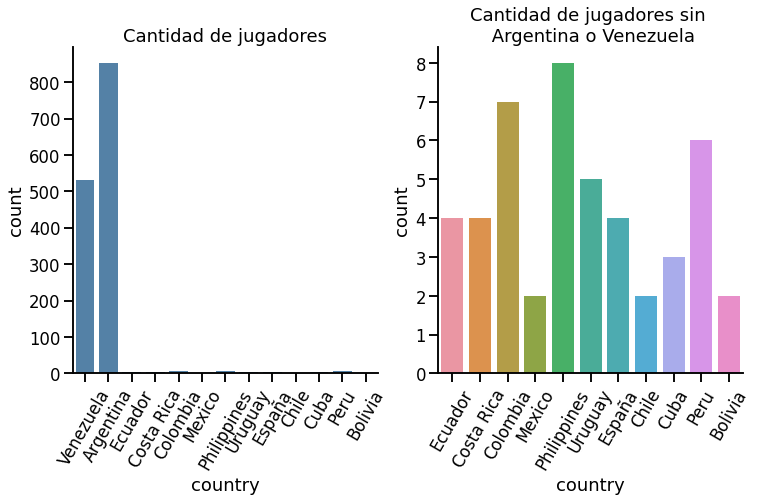

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
seaborn.countplot(df_sn.country, color='steelblue')
plt.title('Cantidad de jugadores')
plt.xticks(rotation=60)

plt.subplot(1,2,2)
plt.title('Cantidad de jugadores sin \n Argentina o Venezuela')
seaborn.countplot(df_sin_arg_ven.country)
plt.xticks(rotation=60)


seaborn.despine()

####Podemos observar el cambio de escala entre un gráfico y otro debido a la gran diferencia de registros que hay entre Argentina y Venezuela y el resto de los paises.

# **Sección 4: Reorganización del dataset**

**1) Derivar distintas características de cada jugador, como ser la cantidad máxima de copas ganadas, la
cantidad de registros de cada uno, edad, etc.**

####En el dataset final 'df_sn' podemos visualizar cada jugador con la cantidad de copas ganas, edad y registros totales

In [ ]:
df_sn.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')

df_sn

,id,number_of_records,has_studies,country,gender,state,year_of_birth,max_cups,age_aprox
0,00037f39cf870a1f49129f9c82d935665d352ffd25ea32...,868,t,Venezuela,Hombre,Miranda,1997.0,1211,25.0
1,000f21ac06aceb9cdd0575e82d0d85fc39bed0a7a1d719...,4199,t,Venezuela,Hombre,Miranda,2003.0,1559,19.0
2,00328ce57bbc14b33bd6695bc8eb32cdf2fb5f3a7d89ec...,7243,t,Argentina,Hombre,Chubut,1996.0,1859,26.0
3,0038263cc90dfa55d621a6425e46020136a318d12b9743...,1326,t,Venezuela,Hombre,Anzoategui,1996.0,1221,26.0
4,0087cf99a4636ebd9a0f66eaf98fde8bca977e2a274bc8...,869,t,Argentina,Hombre,Buenos Aires,1995.0,1200,27.0
...,...,...,...,...,...,...,...,...,...
1427,ff2ccb6ba423d356bd549ed4bfb76e96976a0dcde05a09...,9395,t,Venezuela,Hombre,Monagas,2000.0,1724,22.0
1428,ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ff...,15228,t,Argentina,Hombre,Buenos Aires,2000.0,1856,22.0
1429,ffa6059b954a4602a9fa1518d10ca6163bce3f9d4bd3ee...,47,t,Argentina,Hombre,Buenos Aires,2003.0,1176,19.0
1430,ffab53082b58bed639d2197c3b31c8771f61d58ec39864...,1505,t,Argentina,Hombre,Buenos Aires,1997.0,1421,25.0


**2) Hacer un nuevo dataset donde cada jugador aparezca una vez, junto a sus distintas características derivadas
de los datos crudos.**

####Controlamos que la cantidad de jugadores coincida con la cantidad de registros del dataset 'df_sn'

In [ ]:
print('Cantidad de jugadores: \t\t\t', df_sn.id.unique().shape[0])
print('Cantidad de registros en el dataset: \t', df_sn.shape[0])

Cantidad de jugadores: 			 1432
Cantidad de registros en el dataset: 	 1432


In [ ]:
id_unique_list = df_sn.id.unique()
counter = 0
for id in id_unique_list:
  new_id="Player"
  counter+=1
  df_sn.loc[df_sn.id == id, "id"] = "{}-{}".format(new_id,counter)  

df_sn


,id,number_of_records,has_studies,country,gender,state,year_of_birth,max_cups,age_aprox
0,Player-1,868,t,Venezuela,Hombre,Miranda,1997.0,1211,25.0
1,Player-2,4199,t,Venezuela,Hombre,Miranda,2003.0,1559,19.0
2,Player-3,7243,t,Argentina,Hombre,Chubut,1996.0,1859,26.0
3,Player-4,1326,t,Venezuela,Hombre,Anzoategui,1996.0,1221,26.0
4,Player-5,869,t,Argentina,Hombre,Buenos Aires,1995.0,1200,27.0
...,...,...,...,...,...,...,...,...,...
1427,Player-1428,9395,t,Venezuela,Hombre,Monagas,2000.0,1724,22.0
1428,Player-1429,15228,t,Argentina,Hombre,Buenos Aires,2000.0,1856,22.0
1429,Player-1430,47,t,Argentina,Hombre,Buenos Aires,2003.0,1176,19.0
1430,Player-1431,1505,t,Argentina,Hombre,Buenos Aires,1997.0,1421,25.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_sn.to_csv("/content/drive/Shareddrives/Análisis Inteligente de Jugadores de Reconocido Juego Electrónico/Rocio-Luis-Nicolas/TP N°3 /df_sn.csv", index = True)